<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Numbers_In_Pi_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numbers In Pi

Given a string representation of the first n digits of Pi and a list of positive integers (all in string format), write a function that returns the smallest number of spaces that can be added to the n digits of Pi such that all resulting numbers are found in the list of integers.

Note that a single number can appear multiple times in the resulting numbers. For example, if Pi is `"3141"` and the numbers are `["1", "3", "4"]`, the number `"1"` is allowed to appear twice in the list of resulting numbers after three spaces are added: `"3 | 1 | 4 | 1"`.

If no number of spaces to be added exists such that all resulting numbers are found in the list of integers, the function should return `-1`.

Sample Input

```
pi = "3141592653589793238462643383279",
numbers = ["314159265358979323846", "26433", "8", "3279", "314159265", "35897932384626433832", "79"]
```

Sample Output

```
2 // "314159265 | 35897932384626433832 | 79"
```



# Solution 1

In [1]:
# Time = O(n^3 + m)
# n^2 prefix. each prefix require O(n) for slicing string
# Space = O(n + m)
# n = digits in pi
# m = element in numbers list
def numbersInPi(pi, numbers):
	numbers_table = {number for number in numbers}
	min_spaces = get_min_space(pi, numbers_table, {}, 0)
	return min_spaces if min_spaces != float('inf') else -1

def get_min_space(pi, numbers_table, cache, idx):
	if idx == len(pi):
		return -1
	if idx in cache:
		return cache[idx]
	min_spaces = float('inf')

	for i in range(idx, len(pi)):
		prefix = pi[idx:i + 1]
		if prefix in numbers_table:
			min_spaces_in_suffix = get_min_space(pi, numbers_table, cache, i + 1)
			min_spaces = min(min_spaces, min_spaces_in_suffix + 1)
	cache[idx] = min_spaces
	return cache[idx]

In [2]:
pi = "3141592653589793238462643383279"
numbers = ["314159265358979323846", "26433", "8", "3279", "314159265", "35897932384626433832", "79"]
numbersInPi(pi, numbers)

2

# Solution 2

In [3]:
# Time = O(n^3 + m)
# Space = O(n + m)
# n = digits in pi
# m = element in numbers list
def numbersInPi(pi, numbers):
  numbers_table = {number for number in numbers}
  cache = {}
  for i in reversed(range(len(pi))):
    get_min_space(pi, numbers_table, cache, i)
  return cache[0] if cache[0] != float('inf') else -1

def get_min_space(pi, numbers_table, cache, idx):
  if idx == len(pi):
    return -1
  if idx in cache:
    return cache[idx]
  min_spaces = float('inf')

  for i in range(idx, len(pi)):
    prefix = pi[idx:i + 1]
    if prefix in numbers_table:

      min_spaces_in_suffix = get_min_space(pi, numbers_table, cache, i + 1)
      min_spaces = min(min_spaces, min_spaces_in_suffix + 1)
  cache[idx] = min_spaces
  return cache[idx]


In [4]:
pi = "3141592653589793238462643383279"
numbers = ["314159265358979323846", "26433", "8", "3279", "314159265", "35897932384626433832", "79"]
numbersInPi(pi, numbers)

2

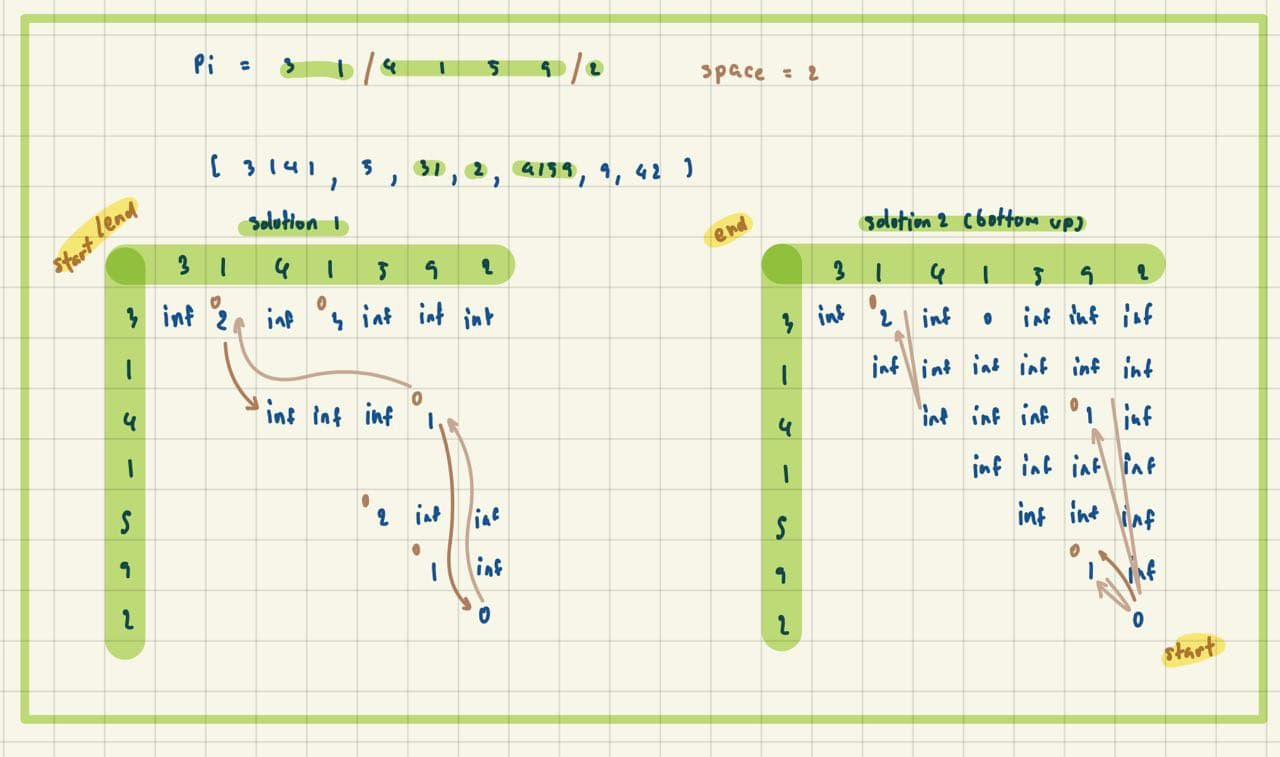